In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


# necessary liblaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb # Often pre-installed in Kaggle environments, if not, you'll need to install it

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# load the dataset

In [3]:
train_path = '/kaggle/input/binaryclassificationwithabankchurndataset/train.csv'
test_path = '/kaggle/input/binaryclassificationwithabankchurndataset/test.csv'
sample_submission_path = '/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv'

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)


print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("Sample Submission shape:", sample_submission_df.shape)


Train data shape: (15000, 14)
Test data shape: (10000, 13)
Sample Submission shape: (10000, 2)


# Data analysis

In [4]:
print(f"Train Data Head: \n{train_df.head()}")
print(f"\nTest Data Head: \n{test_df.head()}")

Train Data Head: 
   id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0   0  15702656.0           Nwora        567.0    France    Male  33.0   
1   1  15647965.0     Yevdokimova        628.0    France  Female  38.0   
2   2  15798834.0           Ch'iu        635.0    France  Female  29.0   
3   3  15672056.0            Hsia        681.0    France    Male  28.0   
4   4  15759537.0  Okwudilichukwu        587.0    France  Female  27.0   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0     9.0      0.0            2.0        1.0             0.0        156792.89   
1     3.0      0.0            1.0        1.0             1.0         51987.99   
2     3.0      0.0            2.0        1.0             1.0        113079.19   
3     6.0      0.0            2.0        1.0             0.0         14081.64   
4     5.0      0.0            2.0        1.0             0.0        158958.90   

   Exited  
0     0.0  
1     1.0  
2     0.0  
3 

In [5]:
print(f"Train Data Info: {train_df.info()}")
print(f"\nTest Data Info: {test_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
Train Data Info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 

In [6]:
print("\nMissing values in Train Data:")
print(train_df.isnull().sum())
print("\nMissing values in Test Data:")
print(test_df.isnull().sum())


Missing values in Train Data:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Missing values in Test Data:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [7]:
print("\nTrain Data Description:")
print(train_df.describe())
print("\nTest Data Description:")
print(test_df.describe())


Train Data Description:
                 id    CustomerId   CreditScore           Age        Tenure  \
count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
mean    7499.500000  1.579454e+07    657.856800     37.710133      5.018667   
std     4330.271354  1.268495e+07     72.678739      8.144880      2.787407   
min        0.000000  1.567151e+05    431.000000     18.000000      0.000000   
25%     3749.750000  1.563435e+07    602.000000     32.000000      3.000000   
50%     7499.500000  1.568947e+07    661.000000     37.000000      5.000000   
75%    11249.250000  1.575682e+07    707.000000     42.000000      7.000000   
max    14999.000000  1.569172e+09    850.000000     72.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   15000.000000   15000.000000  15000.000000    15000.000000   
mean    42338.107539       1.590533      0.779133        0.496000   
std     59703.047751       0.525822      0.414845       

In [8]:
TARGET_COLUMN = 'Exited' 

In [9]:
print(f"\nDistribution of '{TARGET_COLUMN}' in Train Data:")
print(train_df[TARGET_COLUMN].value_counts())
print(f"Percentage distribution of '{TARGET_COLUMN}':")
print(train_df[TARGET_COLUMN].value_counts(normalize=True) * 100)


Distribution of 'Exited' in Train Data:
Exited
0.0    12023
1.0     2977
Name: count, dtype: int64
Percentage distribution of 'Exited':
Exited
0.0    80.153333
1.0    19.846667
Name: proportion, dtype: float64


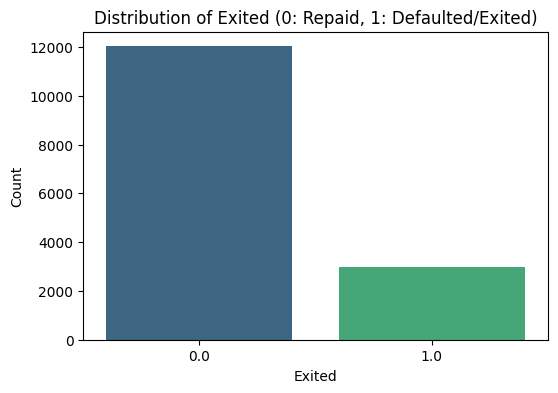

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=TARGET_COLUMN, data=train_df,  palette="viridis")
plt.title(f"Distribution of {TARGET_COLUMN} (0: Repaid, 1: Defaulted/Exited)")
plt.xlabel(TARGET_COLUMN)
plt.ylabel("Count")
plt.show()

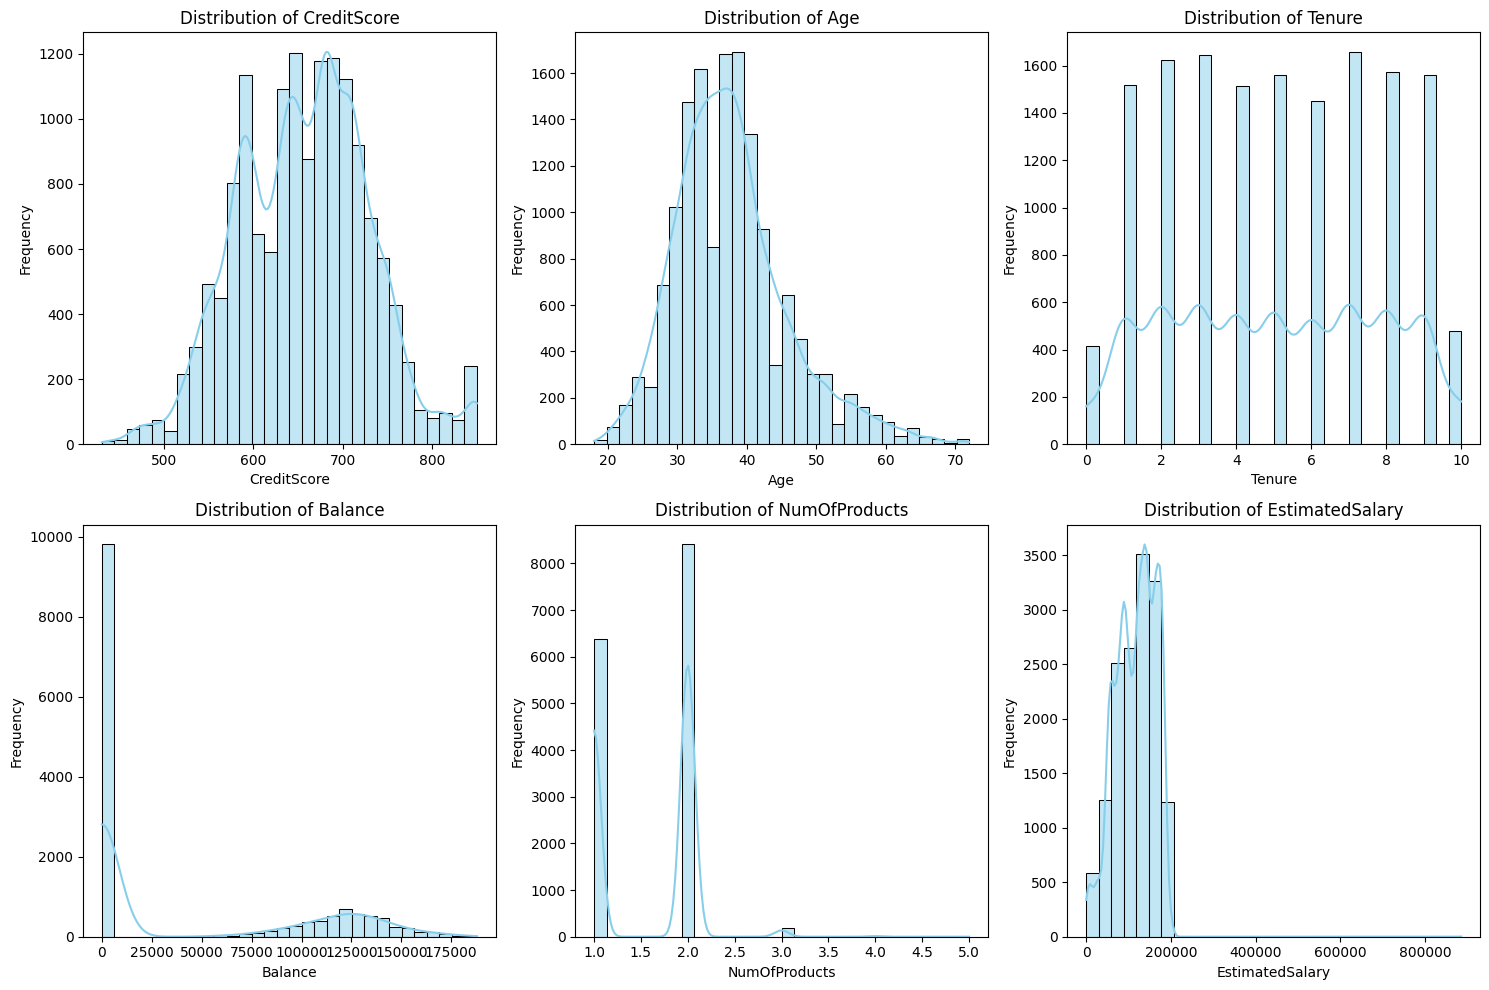

In [11]:
# numeric feature distiributions
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

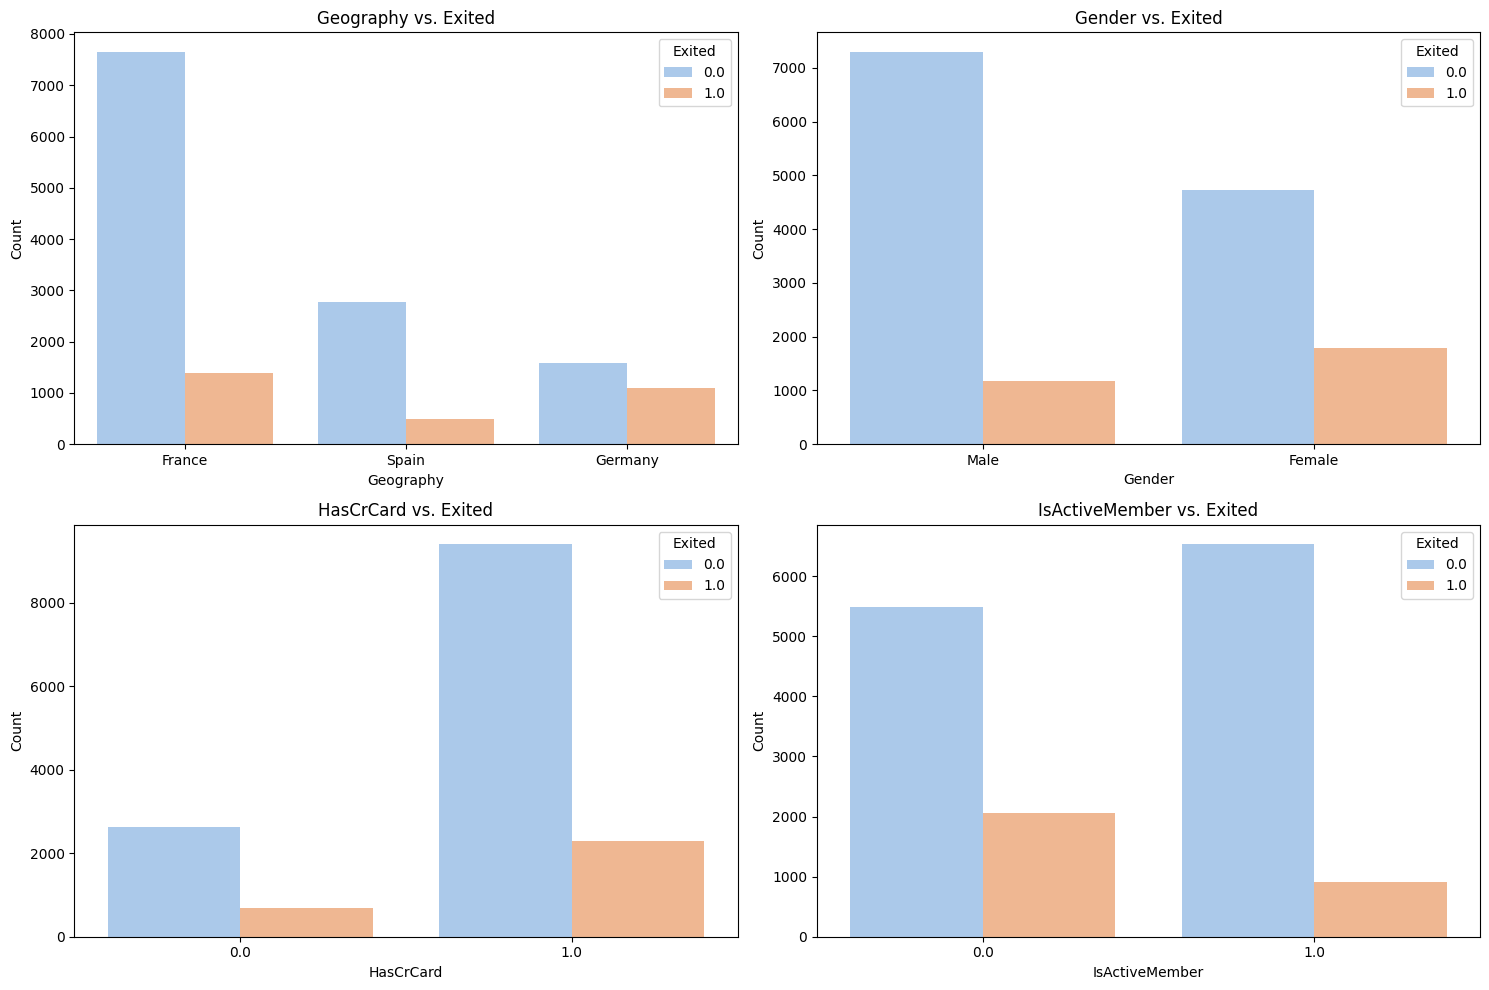

In [12]:
# categorical feature vs target
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue=TARGET_COLUMN, data=train_df, palette='pastel')
    plt.title(f'{col} vs. {TARGET_COLUMN}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

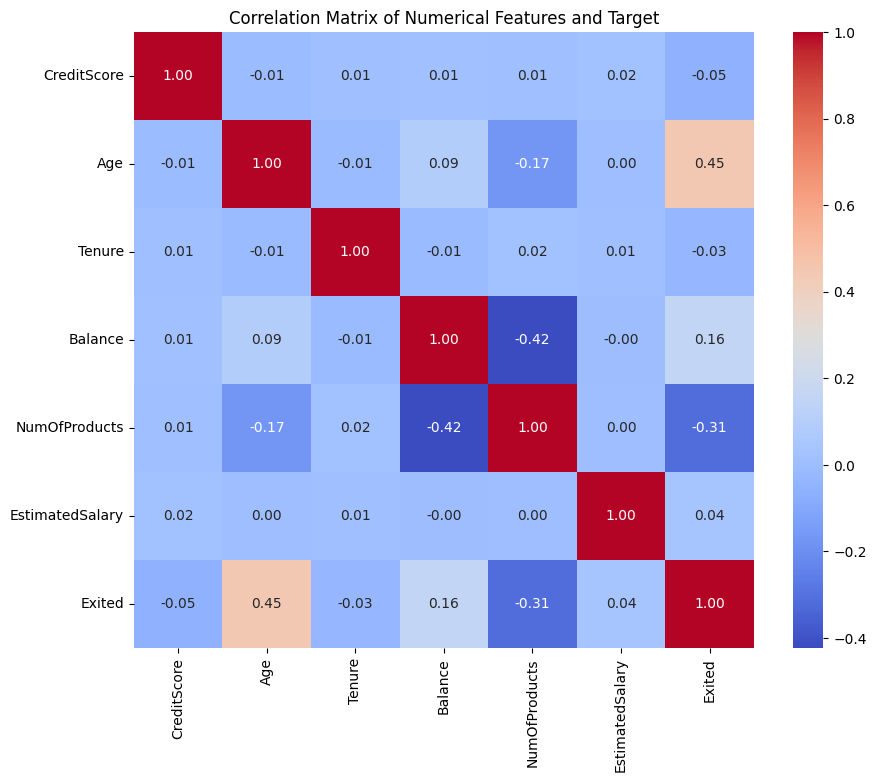

In [13]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(train_df[numerical_features + [TARGET_COLUMN]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features and Target")
plt.show()

# Data Preprocessing

In [14]:
# --- Feature and Target Separation ---
X = train_df.drop(columns=['id', 'CustomerId', 'Surname', TARGET_COLUMN])
y = train_df[TARGET_COLUMN]

# For the test set, we only need features (no target)
X_test = test_df.drop(columns=['id', 'CustomerId', 'Surname'])

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)
print("Original X_test shape:", X_test.shape)

# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# --- Create a Preprocessing Pipeline ---
# This will apply StandardScaler to numerical features and OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are
)

# Fit and transform the training data
X_processed = preprocessor.fit_transform(X)

# Transform the test data (CRITICAL: only transform, do NOT fit again to prevent data leakage)
X_test_processed = preprocessor.transform(X_test)

# Convert processed arrays back to DataFrame (optional, but good for inspection)
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

print("\nProcessed X shape:", X_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)
print("\nProcessed X (first 5 rows):")
print(X_processed_df.head())
print("\nProcessed X_test (first 5 rows):")
print(X_test_processed_df.head())

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("\nData Split Complete!")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Original X shape: (15000, 10)
Original y shape: (15000,)
Original X_test shape: (10000, 10)

Numerical Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Features: ['Geography', 'Gender']

Processed X shape: (15000, 11)
Processed X_test shape: (10000, 11)

Processed X (first 5 rows):
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -1.250157 -0.578313  1.428376 -0.709168       0.778743   0.532426   
1    -0.410819  0.035590 -0.724234 -0.709168      -1.123104   0.532426   
2    -0.314501 -1.069436 -0.724234 -0.709168       0.778743   0.532426   
3     0.318442 -1.192216  0.352071 -0.709168       0.778743   0.532426   
4    -0.974964 -1.314997 -0.006697 -0.709168       0.778743   0.532426   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -0.992032         0.865414                0.0              0.0   
1        1.008032        -1.410679      


Training Logistic Regression Model 

Logistic Regression - Validation Accuracy: 0.8730
Logistic Regression - Validation ROC AUC: 0.8839

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      2405
         1.0       0.75      0.54      0.63       595

    accuracy                           0.87      3000
   macro avg       0.82      0.75      0.78      3000
weighted avg       0.87      0.87      0.86      3000



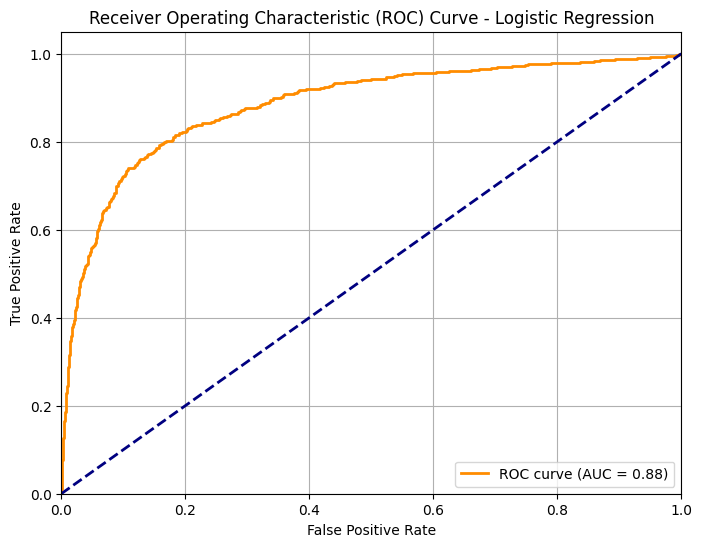

In [15]:
print("\nTraining Logistic Regression Model ")

# Initialize the model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' for smaller datasets, 'lbfgs' is default

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_log_reg = log_reg_model.predict(X_val)
y_proba_log_reg = log_reg_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class (1)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_val, y_proba_log_reg)

print(f"\nLogistic Regression - Validation Accuracy: {log_reg_accuracy:.4f}")
print(f"Logistic Regression - Validation ROC AUC: {log_reg_roc_auc:.4f}")
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

# --- Visualization: ROC Curve for Logistic Regression ---
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_val, y_proba_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (AUC = {log_reg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Store results for comparison
model_results = {}
model_results['Logistic Regression'] = {'Accuracy': log_reg_accuracy, 'ROC AUC': log_reg_roc_auc}


Training Random Forest Classifier

Random Forest - Validation Accuracy: 0.8983
Random Forest - Validation ROC AUC: 0.9231

Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2405
         1.0       0.80      0.65      0.72       595

    accuracy                           0.90      3000
   macro avg       0.86      0.81      0.83      3000
weighted avg       0.89      0.90      0.89      3000



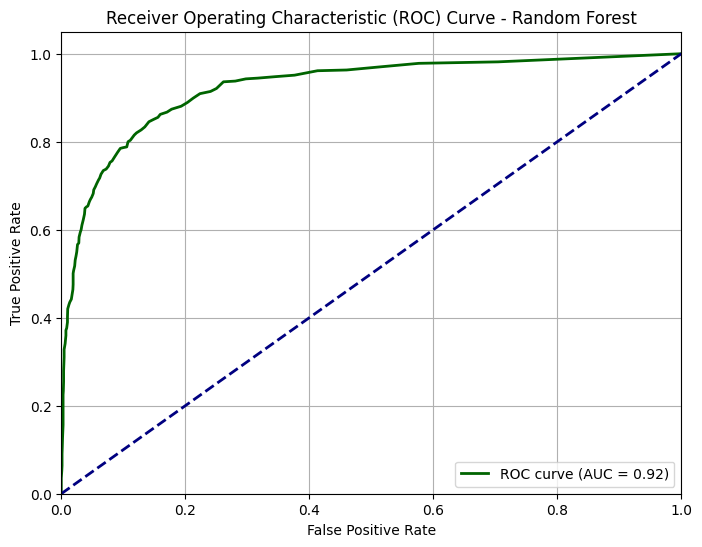

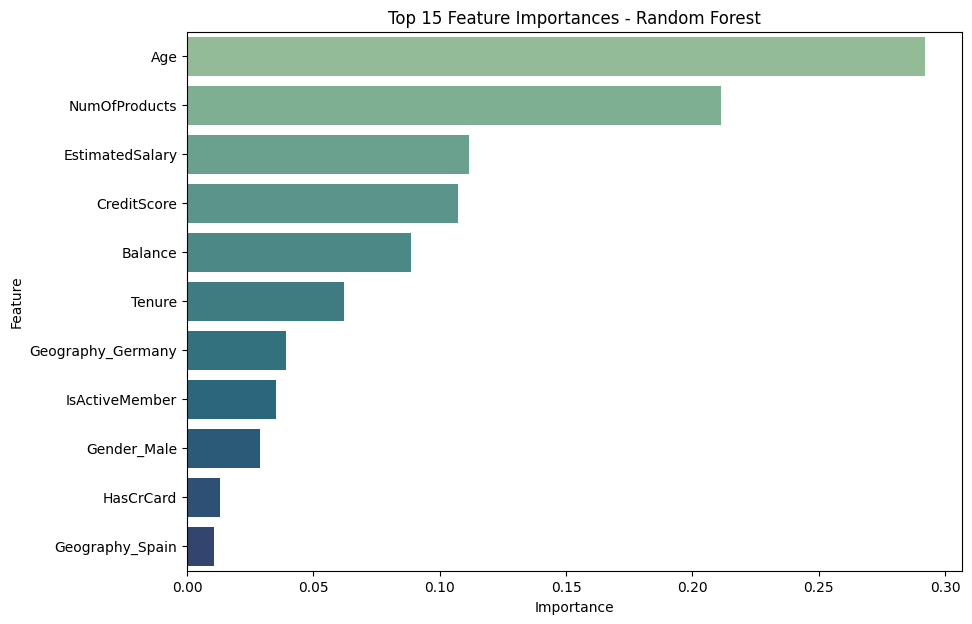

In [16]:
print("\nTraining Random Forest Classifier")

# Initialize the model
# n_estimators: number of trees in the forest
# class_weight: 'balanced' can help with imbalanced datasets
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_roc_auc = roc_auc_score(y_val, y_proba_rf)

print(f"\nRandom Forest - Validation Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest - Validation ROC AUC: {rf_roc_auc:.4f}")
print("\nRandom Forest - Classification Report:")
print(classification_report(y_val, y_pred_rf))

# Visualization: ROC Curve for Random Forest 
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Visualization: Feature Importance for Random Forest 
feature_importances = pd.Series(rf_model.feature_importances_, index=all_feature_names)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances_sorted.head(15), y=feature_importances_sorted.head(15).index, palette='crest')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Store results for comparison
model_results['Random Forest'] = {'Accuracy': rf_accuracy, 'ROC AUC': rf_roc_auc}


Training LightGBM Classifier 
[LightGBM] [Info] Number of positive: 2382, number of negative: 9618
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198500 -> initscore=-1.395696
[LightGBM] [Info] Start training from score -1.395696

LightGBM - Validation Accuracy: 0.8690
LightGBM - Validation ROC AUC: 0.9298

LightGBM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      2405
         1.0       0.63      0.83      0.72       595

    accuracy                           0.87      3000
   macro avg       0.79      0.86      0.82      3000
weighted avg       0.89      

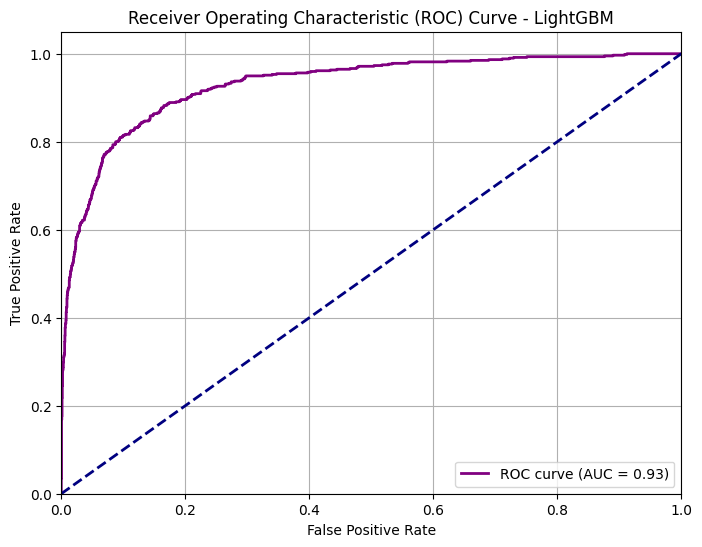

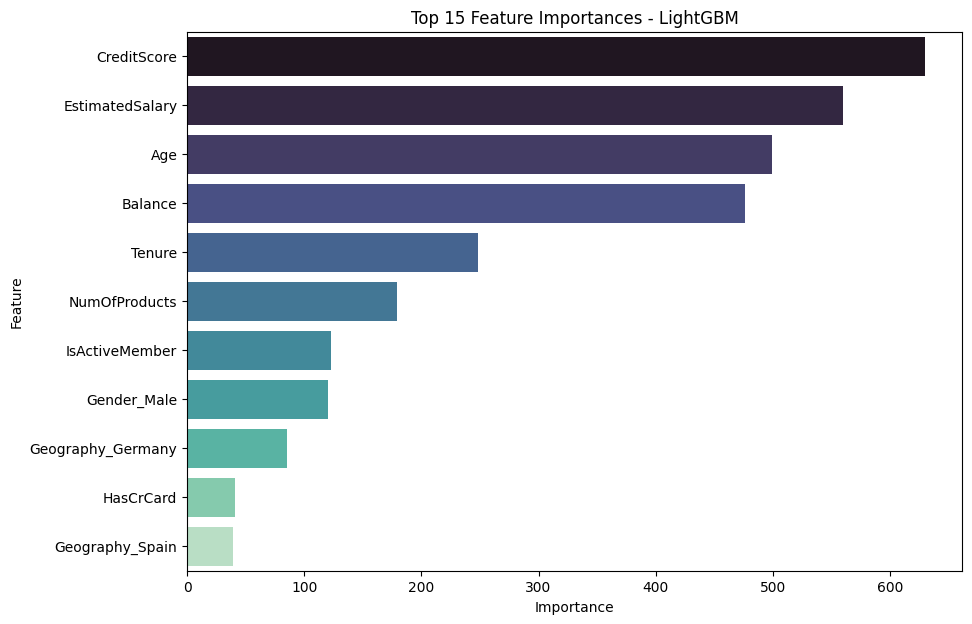

In [17]:
print("\nTraining LightGBM Classifier ")

# Initialize the model
# objective: 'binary' for binary classification
# metric: 'auc' for ROC AUC score
# is_unbalance: True can help with imbalanced datasets
lgbm_model = lgb.LGBMClassifier(random_state=42, objective='binary', metric='auc', is_unbalance=True)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lgbm = lgbm_model.predict(X_val)
y_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Evaluate the model
lgbm_accuracy = accuracy_score(y_val, y_pred_lgbm)
lgbm_roc_auc = roc_auc_score(y_val, y_proba_lgbm)

print(f"\nLightGBM - Validation Accuracy: {lgbm_accuracy:.4f}")
print(f"LightGBM - Validation ROC AUC: {lgbm_roc_auc:.4f}")
print("\nLightGBM - Classification Report:")
print(classification_report(y_val, y_pred_lgbm))

# --- Visualization: ROC Curve for LightGBM ---
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_proba_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', lw=2, label=f'ROC curve (AUC = {lgbm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Visualization: Feature Importance for LightGBM 
feature_importances_lgbm = pd.Series(lgbm_model.feature_importances_, index=all_feature_names)
feature_importances_lgbm_sorted = feature_importances_lgbm.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances_lgbm_sorted.head(15), y=feature_importances_lgbm_sorted.head(15).index, palette='mako')
plt.title('Top 15 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Store results for comparison
model_results['LightGBM'] = {'Accuracy': lgbm_accuracy, 'ROC AUC': lgbm_roc_auc}


Model Comparison Summary 
                     Accuracy  ROC AUC
Logistic Regression    0.8730   0.8839
Random Forest          0.8983   0.9231
LightGBM               0.8690   0.9298


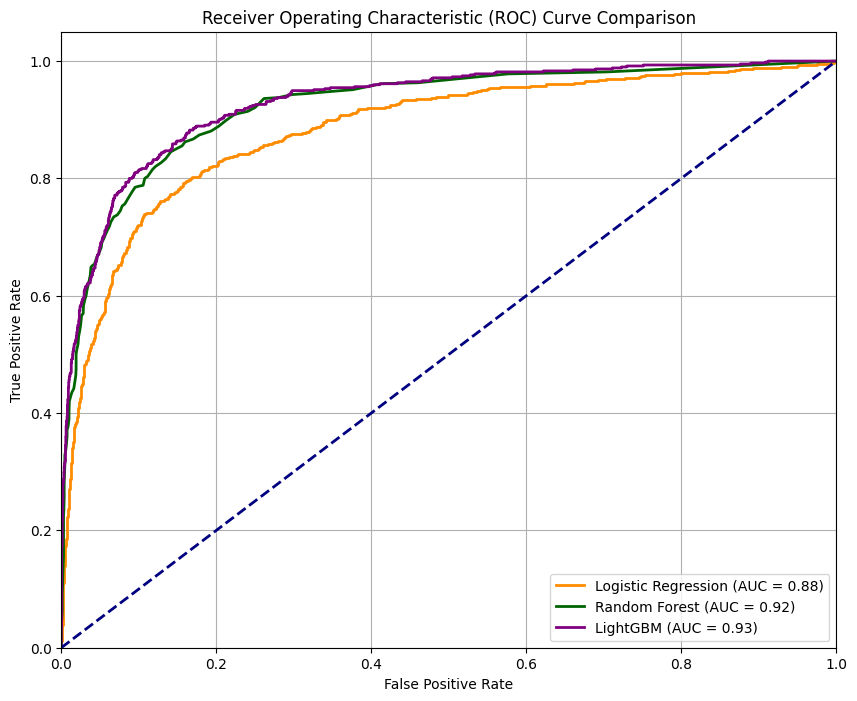


Based on ROC AUC, the best performing model is: LightGBM with ROC AUC of 0.9298
Selected model for final prediction: LGBMClassifier


In [18]:
print("\nModel Comparison Summary ")

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(model_results).T # Transpose to have models as rows
print(results_df.round(4))

# Visual Comparison of ROC Curves 
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', lw=2, label=f'LightGBM (AUC = {lgbm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Select the best model 
best_model_name = results_df['ROC AUC'].idxmax()
best_model_roc_auc = results_df['ROC AUC'].max()

print(f"\nBased on ROC AUC, the best performing model is: {best_model_name} with ROC AUC of {best_model_roc_auc:.4f}")

# Assign the best model for final prediction
if best_model_name == 'Logistic Regression':
    final_model = log_reg_model
elif best_model_name == 'Random Forest':
    final_model = rf_model
else: # Default to LightGBM if it's the best or for any other case
    final_model = lgbm_model

print(f"Selected model for final prediction: {type(final_model).__name__}")

In [19]:
print("\n Generating Final Predictions for Submission ")

# Use the selected best model to predict probabilities on the preprocessed test data
final_test_probabilities = final_model.predict_proba(X_test_processed)[:, 1]

# Create the submission DataFrame
# Make sure 'id' column from the original test_df is used
submission_df = pd.DataFrame({
    'id': test_df['id'], # Assuming 'id' is the correct identifier column name in your test_df
    TARGET_COLUMN: final_test_probabilities # Use the target column name for your predictions
})

# Display first few rows of the submission file
print("\nSubmission File Head:")
print(submission_df.head())

# Save the submission file
submission_file_name = 'submission.csv'
submission_df.to_csv(submission_file_name, index=False)

print(f"\nSubmission file '{submission_file_name}' created successfully! Ready to submit to Kaggle.")


 Generating Final Predictions for Submission 

Submission File Head:
      id    Exited
0  15000  0.037417
1  15001  0.291642
2  15002  0.134004
3  15003  0.220717
4  15004  0.007337

Submission file 'submission.csv' created successfully! Ready to submit to Kaggle.
